# Movie Director's Office
---
- **topic**: Investment opportunity assessment
- **client**: [Sequoia](https://www.sequoiacap.com/)
- **oppotunity**: [Universal Pictures](https://www.universalpictures.com/) has offered Sequoia to buy options for the movie rights of the upcoming movies of their Dark Universe franchise.
---

## Scope of the project

The Dark Universe is a franchise of monster movies produced by Universal Pictures. If the concept was promising, latest release such as `Dracula Untold` were not as successful as expected. The franchise seems in difficulty as the production studio has scrapped Bride of Frankenstein, Frankenstein's Monster, The Invisible Man, Dr. Jekyll & Mr. Hyde, Dracula Untold 2, and a remake of Van Helsing from its production schedule. The studio is willing to share the risk and potential reward with Sequoia buy selling bundled options for the upcoming movies rights.

Sequoia has a strong expertise in risky ventures and movies are risky ventures for sure. However, the studio has no track record in the movie industry and is looking for an external assessment of the opportunity.

Sequoia has reached out to the `Movie Director's Office` consultancy firm to answer the following question:

> Is it possible to predict the success of a movie before its release?

## Methodology

The consultancy firm has decided to use its existing data from [IMDb](https://www.imdb.com/), explore, and enrich it. Then, they'll try to predict the movie success to see if it is possible for Sequoia to de-risk the investment opportunity.

For this project, the team of consultants is multi-disciplinary and composed of:
- **Ben** who is a researcher and will help matching the data from IMDb with other sources (MDO_Researcher).
- **Elise** who is a statistician and will help understanding the data through statistical analysis (MDO_Statistician).
- **Marc** who is an agent and can provide insights on the movie industry (MDO_Agent).
- **Sarah** who is a forecaster and will see if the data can be used to predict the success of a movie (MDO_Forecaster).

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from mdo import *

# The enriched data is the result of the team's work as will be explained below
enriched_data_path = 'mdo/data/enriched_data.csv'

# The team can thus use that data instead of the raw data (.from_enriched() class method)
Ben = MDO_Researcher.from_enriched(path=enriched_data_path)
Elise = MDO_Statistician.from_enriched(path=enriched_data_path)
Marc = MDO_Agent.from_enriched(path=enriched_data_path)
Sarah = MDO_Forecaster.from_enriched(path=enriched_data_path)

Welcome to the Movie Director Office! 🎬
Please, meet our team: Researcher, Statistician, Agent, and Forecaster.


# Structure of the project

Here are main section in the Movie Director's Office's process to answer the question:

- [1. Success definition](#1.-Success-definition)
- [2. Drivers of success](#2.-Drivers-of-success)
- [3. Predicting success](#3.-Predicting-success)
- [4. Discussion and conclusion](#4.-Discussion-and-conclusion)

---

## 1. Success definition
*back to [table of contents](#Structure-of-the-project)*

The first step of the project is to define what success metrics to use. From their historical data, the consultants have identified two main options:
- **IMDb rating**: the rating of the movie on IMDb. This gives an idea of the success of the movie from the public perspective.
- **Box office**: the revenue generated by the movie. This gives an idea of the success of the movie from the industry perspective.

Elise suggested a few analyses to make the right choice. She proposed to:
- Analyze the correlation between both metrics to see if they could be used interchangeably.
- See if the IMDb rating are normally distributed and correctly differentiate good and bad movies. In fact, she read that the [IMDb ratings are skewed](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/) towards the high end.
- Have a look at the financial metrics of previous movies to see if we can identify any pattern.

---

In [3]:
# Correlation between the budget and the imdb score
Elise.get_correlation(target='imdb_score', predictors=["gross"])

,correlation_imdb_score,p-value,significant
gross,-0.098738,0.001387,1


If the rating and the box office are correlated, they have a negative correlation and cover two very different aspects of the movie success. They can therefore not be used interchangeably. 

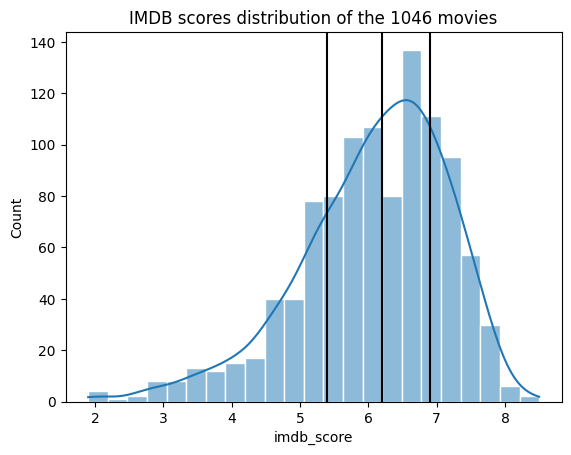

count    1046.000000
mean        6.080019
std         1.081826
min         1.900000
25%         5.400000
50%         6.200000
75%         6.900000
max         8.500000
Name: imdb_score, dtype: float64

In [4]:
# Are IMDB scores skewed?
Elise.get_dist_scores(plot=True)

The article Elise read was right. The IMDb ratings are indeed skewed towards the high end with 75% of the movies scoring more than 5.4/10. It therefore seems that poor movies are not well identified by the IMDb ratings.

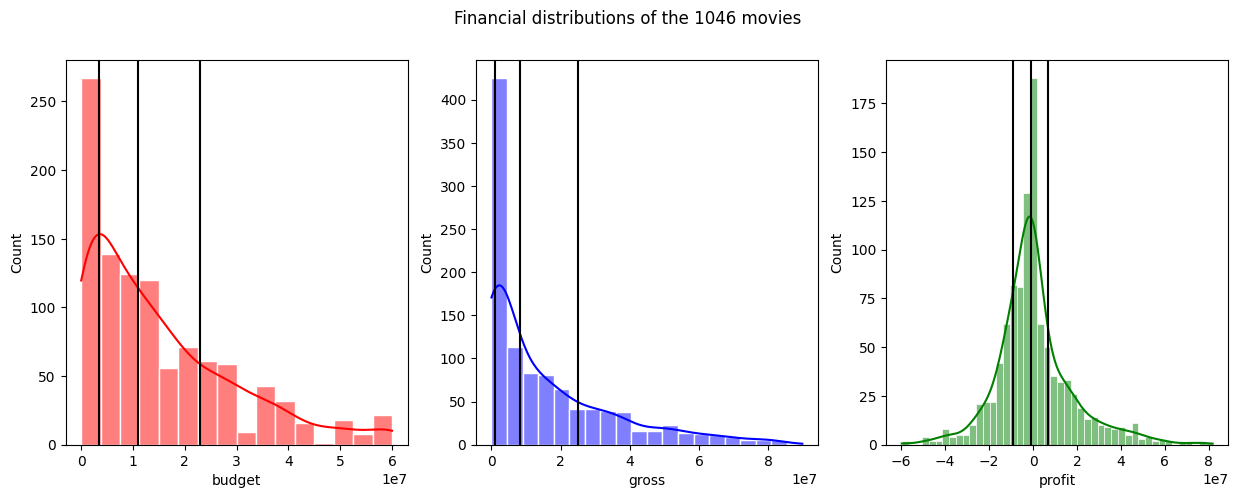

,budget,gross,profit
count,1046.0,1046.0,1046.0
mean,15357181.251434,15949503.660612,592322.409178
std,14503900.44725,19071006.471354,17600804.649789
min,218.0,703.0,-59768583.0
25%,3500000.0,1042200.75,-8928740.25
50%,11000000.0,8189048.5,-991797.5
75%,23000000.0,25031940.25,6783748.0
max,60000000.0,89808372.0,81700000.0
movie_highest,This Is It,"Legally Blonde 2: Red, White & Blonde",Pinocchio
movie_lowest,Tarnation,The Jimmy Show,The Swindle


In [5]:
# Can we learn anything from the financials?
Elise.get_dist_financials(plot=True)

The historical financial metrics show big right tail for both the budget and the revenue. This means that there are a few movies with very high budgets and revenues and that these successes are not the norm and likely hard to predict. To support that conclusion, we notice that the profit generated by the movies looks quite random. In fact, the profit distribution is centered around 0 with almost as much chance to make a profit as to make a loss. For example, the Swindle made a huge loss despite featuring the top french actor François Cluzet and being directed by the famous director Claude Chabrol.

Elise's conclusion:
> The IMDb ratings are skewed and won't help to filter bad movies out. Moreover, the real challenge for Sequoia is to know how much the movies will generate when they buy the options. We will therefore focus on predicting the box office (`gross`). However, Elise highlighted that this will be a challenging task as the successful movies are in the right tail of the distribution and are hard to predict.

---

## 2. Drivers of success
*back to [table of contents](#Structure-of-the-project)*
Now that the team aligned on how success would be measured, the team will work collecting as much relevant data as possible to get a grasp on what drives the box office success of a movie.

[2.1. Actors network](#2.1.-Actors-network) </br>
Marc, the agent, will process the list of actors who starred in the movies to create a network of actors who have played together. Based on his experience, he believes that actors who are well connected (degree), who are the link between different groups of actors (betweenness), and who can reach many other actors in the network (closeness) are likely to make a movie successful.

[2.2. Release date](#2.2.-Release-date) </br>
Ben, the researcher, noticed that their current dataset is missing the release date of the movies which is a key information to understand the context in which the movie was released. He will therefore scrape the release date of the movies from IMDb (which gives authorization for scraping) with multiple bots.

[2.3. Market potential](#2.3.-Market-potential) </br>
Elise, the statistician, mentioned that the country of origin of the movie is relevant as the movie industry is very different from one country to another. But she wants to go further than the simple name of the country and will use geospacial data to get the population and the GDP of the country of origin of the movie to get a sense of the market size and wealth of the country.

[2.4. Modeling insights](#2.4.-Modeling-insights) </br>
Elise will use statistical analysis such as the pearson correlation and anova test to help Sarah understand the features that could be relevant to predict the box office of a movie.

---

### 2.1. Actors network
*back to [section 2](#2.-What-drives-success?)*

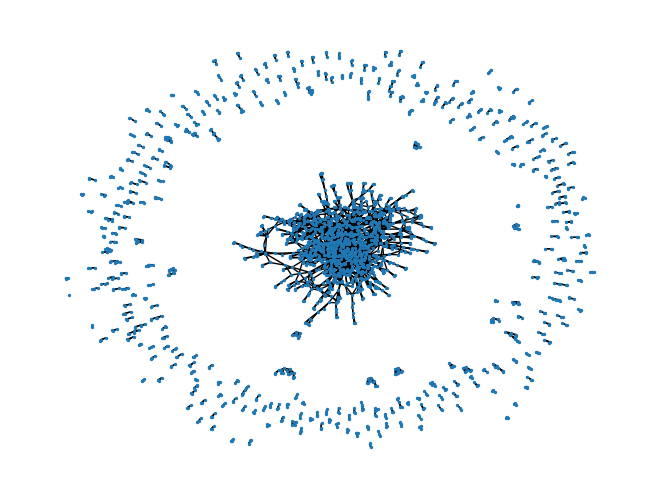

In [6]:
# To create the network graph from the list of actors per movie use:
# Marc.create_actors_network(save_to='mdo/data/actors.pickle')

# The creation takes some time, but it is only necessary once. The plot still takes some time.
g = Marc.create_actors_network(save_to=None, load_from='mdo/data/actors.pickle', plot=True)

Thanks to Marc, we see that a big portion of the actors are interconnected in the center of the network. After exploration, this is the cluster of American based movies which represent a huge proportion of our dataset. However, there are also small other clusters (called components) with a few interconnected actors. Ben will use that graph to enrich the dataset with the degree, betweenness, and closeness of the actors.

Marc went further and developed tools for Sequoia to explore the network of actors. Let's for example have a look at the second biggest cluster of actors. Then, in that cluster, we can have a look at the first, second, and third degree connections of a specific actor. Then, we can also ask Marc for specific insights on the actors. This should help Sequoia get an in-depth understanding of the industry.

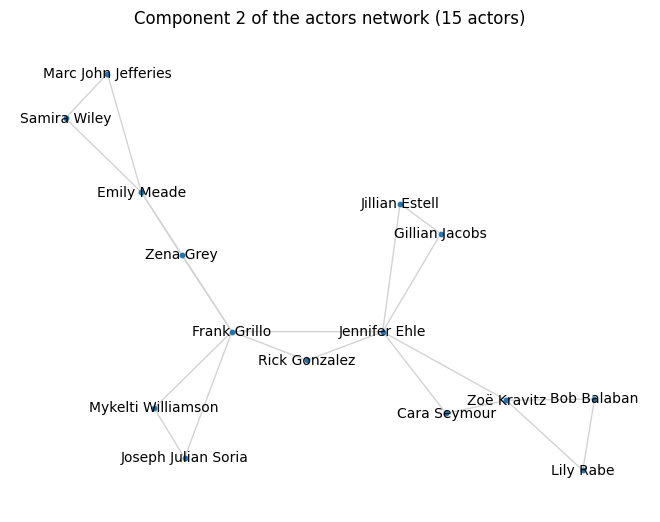

In [7]:
# Let's have a look at the second cluster, the first one is too big for good readability
Marc.show_nth_cluster(n=2)

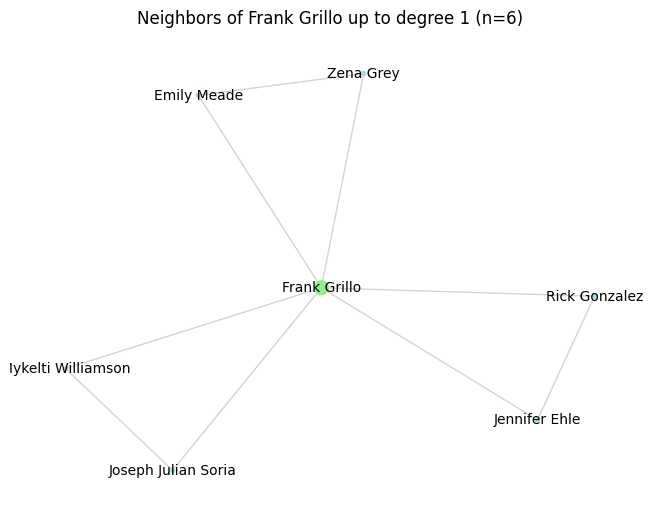

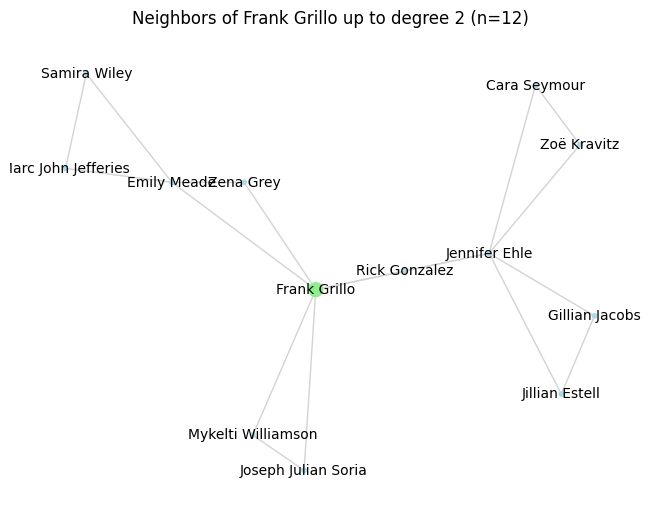

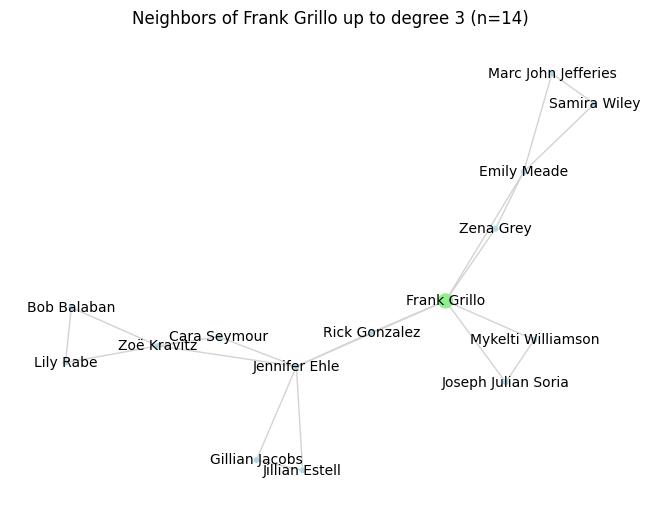

Here is all I know about Frank Grillo:
  - name: frank grillo
  - net_worth: 6000000
  - gender: male
  - nationality: us
  - occupation: ['actor']
  - height: 1.79
  - birthday: 1963-06-08
  - age: 60
  - is_alive: True


In [8]:
# Frank Grillo seems quite central, let's get to know him better
d1 = Marc.show_n_neighbors('Frank Grillo', degree=1, plot=True)
d2 = Marc.show_n_neighbors('Frank Grillo', degree=2, plot=True)
d3 = Marc.show_n_neighbors('Frank Grillo', degree=3, plot=True)
info_grillo = Marc.get_info_celebrity('Frank Grillo')

Thanks to Marc, it is possible to gain quite a few insights on the actors who will star in the upcoming movies of the Dark Universe franchise. We can see that Grillo has quite a few connections and can reach 12/15 actors in his cluster in only 2 steps.

### 2.2. Release date
*back to [section 2](#2.-What-drives-success?)*

Ben doesn't have the time to browse the [IMDb website](https://www.imdb.com/) to get the release date of each movie. He therefore developed a bot to scrape the release date of the movies. He is particularly impatient and therefore used multiple bots to get the data as fast as possible. Here is an example of how it works with 4 bots scraping 5 movies each.

In [9]:
# Ben will have a look at the 20 first movies in his dataset (ben.full.head(20))
Ben.research_release_years(
    movie_titles = Ben.full.head(20)['movie_title'],
    workers = 4)

,movie_title,release_year
0,The Spanish Prisoner,1997
1,Kangaroo Jack,2003
2,Miss Congeniality 2: Armed and Fabulous,2005
3,The Last Castle,2001
4,Oceans,2004
5,The Sentinel,1977
6,Jingle All the Way,1996
7,Exorcist: The Beginning,2004
8,Up Close & Personal,1996
9,Dark Water,2023


### 2.3. Market potential
*back to [section 2](#2.-What-drives-success?)*

Elise who had worked with geospatial data in a previous statistical study decided to make an industry analysis based on the country of origin so that Sequoia can easily visualize the various markets and their potential. From previous studies, she knows that the GDP and the population are two key indicators to understand the market potential and added them to the country information.

In [10]:
# Elise will aggregate all information per country to vizualize it better
Elise.show_me_the_world()

### 2.4. Modeling insights
*back to [section 2](#2.-What-drives-success?)*

Now that Marc, Ben, and Elise have gathered rich insights into the movie industry, we can start using it to uncover the drivers of the box office success of a movie. Ben will first do some work to enrich the original data with all the new features (actors centrality in terms of degree, betweenness, and closeness, release date, and country GDP and population). He will also process the movie genre information to make it usable by Sarah in her model. Then, Elise will run statistical analysis to get a sense of what features (numeric or not) are relevant to predict the box office of a movie.

In [11]:
# Let's see how Ben created the enriched data from scratch

# At first, ben had to look in the company directory to find pre- and after-release data
Ben = MDO_Researcher.from_directory('mdo/data')

# Then, he had to clean and merge the dataset and process the genres information
Ben.prepare_data(verbose=True)
Ben.split_genres(top=10) # Genres of the top 10 movies will be grouped under 'Other'

# Finally, he could enrich the data with the information he scraped and received from the team
Ben.enrich_all(
    save=False, path='mdo/data/enriched_data.csv', # The data was already saved
    country=True, country_par={"columns":['NAME', 'POP_EST', 'GDP_MD']},
    actors=True, actors_par={"centralities":["degree", "betweenness", "closeness"]},
    release_year=True, release_par={"path":"mdo/data/release_years.csv"},
)

# The enriched data is now available for the team
display(Ben.full.head())

Pre-release: 2102 rows with 2102 unique movies
After-release: 1987 rows with 1987 unique movies

Full dataset: 1046 unique movies.


,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,country,content_rating,budget,actor_2_facebook_likes,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes,genre_Drama,genre_Comedy,genre_Romance,genre_Thriller,genre_Crime,genre_Action,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Other,profit,pop_est,gdp_md,actor_1_degree,actor_1_closeness,actor_1_betweenness,actor_2_degree,actor_2_closeness,actor_2_betweenness,actor_3_degree,actor_3_closeness,actor_3_betweenness,year
0,David Mamet,110.0,342.0,393.0,Felicity Huffman,623.0,"[Drama, Mystery, Thriller]",Ben Gazzara,The Spanish Prisoner,1722,Campbell Scott,English,USA,PG,10000000,508.0,97.0,10200000,18697,263.0,7.3,578,1,0,0,1,0,0,0,0,0,0,1,200000,328239523.0,21433226.0,6.0,0.076890,0.004953,6.0,0.083578,0.011591,6.0,0.073669,0.001820,1997.0
1,Jacques Perrin,104.0,63.0,7.0,Jacques Perrin,67.0,"[Documentary, Drama]",Pedro Armendáriz Jr.,Oceans,152,Rie Miyazawa,French,France,G,40000000,63.0,113.0,19406406,7630,42.0,7.8,0,1,0,0,0,0,0,0,0,0,0,1,-20593594,67059887.0,2715518.0,4.0,0.001978,0.000003,2.0,0.001319,0.000000,2.0,0.001319,0.000000,2004.0
2,Renny Harlin,125.0,212.0,394.0,Alan Ford,613.0,"[Horror, Mystery, Thriller]",James D'Arcy,Exorcist: The Beginning,1970,Izabella Scorupco,English,USA,R,50000000,422.0,167.0,41814863,28635,308.0,5.1,893,0,0,0,1,0,0,0,1,0,0,1,-8185137,328239523.0,21433226.0,2.0,0.000879,0.000000,2.0,0.000879,0.000000,2.0,0.000879,0.000000,2004.0
3,Jerry Zucker,134.0,109.0,249.0,Ben Cross,919.0,"[Action, Adventure, Romance, Thriller]",Julia Ormond,First Knight,1695,John Gielgud,English,USA,PG-13,55000000,303.0,53.0,37600435,55350,180.0,5.9,0,0,0,1,1,0,1,1,0,0,0,0,-17399565,328239523.0,21433226.0,4.0,0.077327,0.005738,3.0,0.069717,0.000575,7.0,0.071350,0.006479,1995.0
4,Kenny Ortega,111.0,197.0,6.0,Mekia Cox,433.0,"[Documentary, Music]",Misha Gabriel Hamilton,This Is It,679,Judith Hill,English,USA,PG,60000000,208.0,136.0,71844424,33158,223.0,7.3,0,0,0,0,0,0,0,0,0,0,0,1,11844424,328239523.0,21433226.0,2.0,0.000879,0.000000,2.0,0.000879,0.000000,2.0,0.000879,0.000000,2009.0


Now that the dataset is enriched with many new features, Elise will run her statistical analysis to give an idea to Sarah of what features will be relevant to predict the box office of a movie. She will use the pearson correlation to see the linear relationship between the box office and the numeric features and the anova test to see the relationship between the box office and the categorical features.

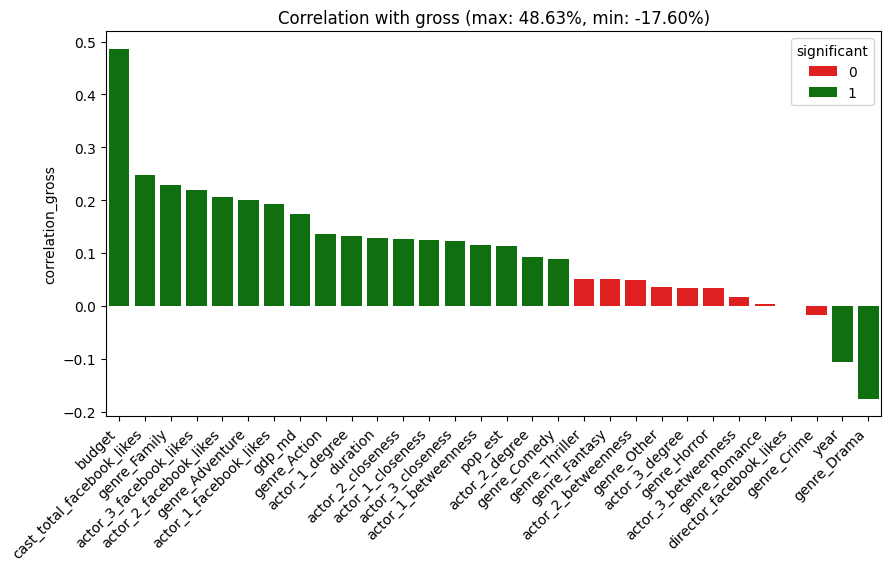

,correlation_gross,p-value,significant
budget,0.486305,3.894367e-59,1
cast_total_facebook_likes,0.247106,4.661127e-15,1
genre_Family,0.228140,5.305511e-13,1
actor_3_facebook_likes,0.218457,5.087467e-12,1
actor_2_facebook_likes,0.206258,7.571729e-11,1
genre_Adventure,0.199461,3.177119e-10,1
actor_1_facebook_likes,0.193013,1.182725e-09,1
genre_Drama,-0.175952,3.095515e-08,1
gdp_md,0.174220,4.238943e-08,1
genre_Action,0.135586,2.116319e-05,1


In [12]:
# Elise needs to filter out rows with missing values to run her tests
Elise = MDO_Statistician.from_enriched(
    path=enriched_data_path, drop_na=True)

# Then, she can run the correlation test
Elise.get_correlation(target="gross", plot=True)

Thanks to Elise, we know that we have 20 features which are relevant to predict the box office. Some of them seem to be more relevant than others such as the `budget` which has the maximum correlation with the gross revenue. More interestingly, the new features brought by the team are statistically significant and were worth researching (namely the gdp, population, the year of release, and most actors centrality measures).

In [13]:
Elise.get_anova(target="gross")

,F-stat gross,p-value
content_rating,11.783379,2.492626e-19
genres,1.655852,2.973736e-08
country,1.686942,1.039435e-02
language,1.674238,2.918379e-02
actor_2_name,1.264529,5.431107e-02
director_name,1.197638,6.211647e-02
actor_1_name,0.987450,5.549966e-01
actor_3_name,0.943763,6.569278e-01


Surprisingly enough, if the centrality measures drawn from the actors network are statistically significant, the name of the actor is not. That justifies even more the work done by Marc to get the centrality measures of the actors. Elise pointed that this might be due to the fact that there are too many categories (each name is different) for the test to be significant. Anyway, besides the numerical features, Sarah should also use dummy variables (yes/no) for the content rating, the country of origin, and the language on top of the genres which Ben already added to the features.

> Team's conclusion: if there were already interesting features in the original dataset, the expertise of the team members allowed to enrich it with many more features which are relevant to predict the box office of a movie. Specifically the actor names are too granular to predict anything and their centrality are more interesting as predictors. Besides providing a Sarah with a rich dataset to work with, the team also provided tools (actors network exploration, and geographical market analysis) to help Sequoia understand the movie industry.

---

## 3. Predicting success
*back to [table of contents](#Structure-of-the-project)*


After the team's hard work to enrich the dataset, Sarah spent weeks trying to use these features to predict the box office of a movie.

[3.1. Initial modelling](#3.1.-Initial-modelling) </br>
Sarah first worked as she usually does, setting up her pipeline for data preparation (X, y preparation, and dummy variables encoder), model evaluation (cross-validation), and experiment logging.

[3.2. Simple models](#3.2.-Simple-models) </br>
After the failure of all models, Sarah discussed with Elise and went back to simple modelling to analyse the results and see whether they could be of any use.

[3.3. Statistical modelling](#3.3.-Statistical-modelling) </br>
Even if the predictions were not good enough for Sequoia to have an edge in the investment opportunity, Elise suggested to use a statistical model to understand the controlled effect of the features on the box office.

---

### 3.1. Initial modelling
*back to [section 3](#3.-Predicting-success)*

Based on the features identified by Elise, Sarah used her usual pipeline to predict the box office of a movie. She tried a few models:
- Dummy regressor to get a baseline
- Linear regression first to keep things simple.
- Lasso regression to avoid overfitting the data with the help of regularization.
- Support vector, k-neighbours, random forest, and xgboost regression to try to capture non-linear patterns.
- And even MLP (neural network) regression to uncover more complex patterns in the data.

She also tried to standardize all features and to select only the most correlated features to the box office. Unfortunately, she achieved no significant results whatsoever.

In [14]:
# Sarah prepares the target, predictors, and all the models she wants to try
Sarah.prepare_X_y(target='gross')
Sarah.initiate_models(standard_scaling=True)

# Then she cross validates all models and logs the results
display(Sarah.evaluate_standard_models(
    cv=5, logs=f"exploration/gross_logs.csv", rank="mse",
    prefix="enriched_scaled_"))

33 initial predictors
102 predictors after encoding
1046 rows before filtering missing values
1011 rows after filtering missing values
Evaluating DummyRegressor
Evaluating LinearRegression
Evaluating Lasso
Evaluating KNeighborsRegressor
Evaluating SVR
Evaluating RandomForestRegressor
Evaluating XGBRegressor
Evaluating MLPRegressor


,model,mse,mape,r2,timestamp
0,enriched_sign_scaled_LinearRegression,2.695341e+14,1.112666e+02,-2.448366e-01,2024-04-23 09:03
1,enriched_sign_scaled_Lasso,2.695341e+14,1.112668e+02,-2.448370e-01,2024-04-23 09:03
2,Lasso,2.752081e+14,1.090124e+02,-3.832356e-01,2024-04-23 09:02
3,scaled_Lasso,2.752938e+14,1.090550e+02,-3.852675e-01,2024-04-23 09:03
4,LinearRegression,2.753864e+14,1.066740e+02,-3.943686e-01,2024-04-23 09:02
5,enriched_Lasso,2.809854e+14,1.140435e+02,-5.144568e-01,2024-04-23 09:03
6,enriched_scaled_Lasso,2.810412e+14,1.140543e+02,-5.157991e-01,2024-04-23 09:03
7,enriched_LinearRegression,2.821058e+14,1.143180e+02,-5.565870e-01,2024-04-23 09:03
8,enriched_MLPRegressor,2.961877e+14,1.032273e+02,-2.783284e-01,2024-04-23 09:03
9,RandomForestRegressor,3.033631e+14,1.748263e+02,-8.851631e-01,2024-04-23 09:02


> Sarah's conclusion: despite trying many models and features modification, all the models are practically useless (negative R²). At this point it is clear for Sarah that no, it is not possible to predict the success of a movie before its release.

### 3.2. Simple models
*back to [section 3](#3.-Predicting-success)*

When listening to Sarah's conclusion, Elise couldn't believe that all the significant predictors identified in the statistical analysis were worthless as predictors. She helped Sarah going into the details of prediction to see if they could be useful in any way.

1 initial predictors
1 predictors after encoding
1046 rows before filtering missing values
1046 rows after filtering missing values
2024-04-26 12:38: LR budget
  - mse: 288317598581402.8125
  - mape: 151.7767
  - r2: -0.3674


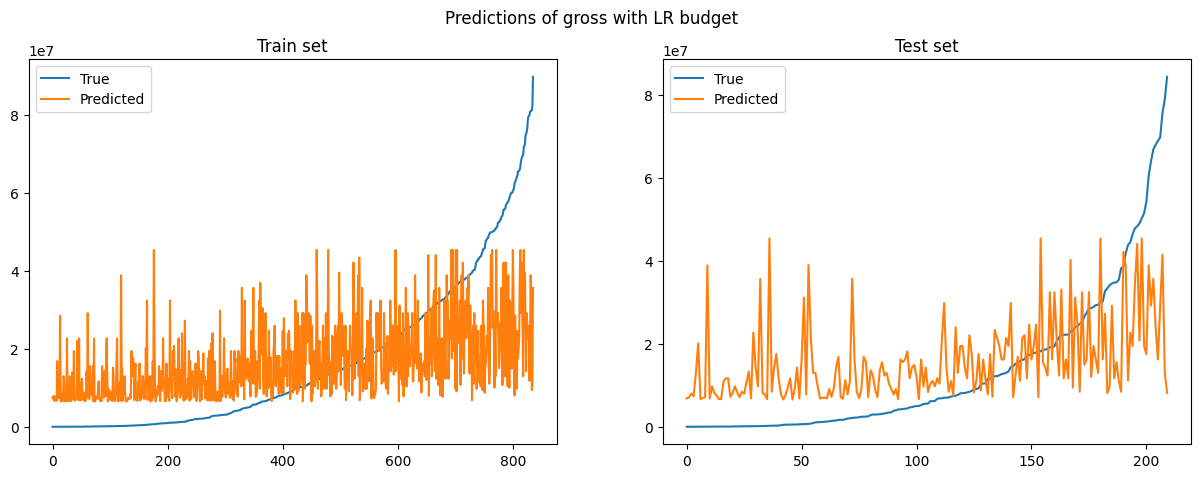

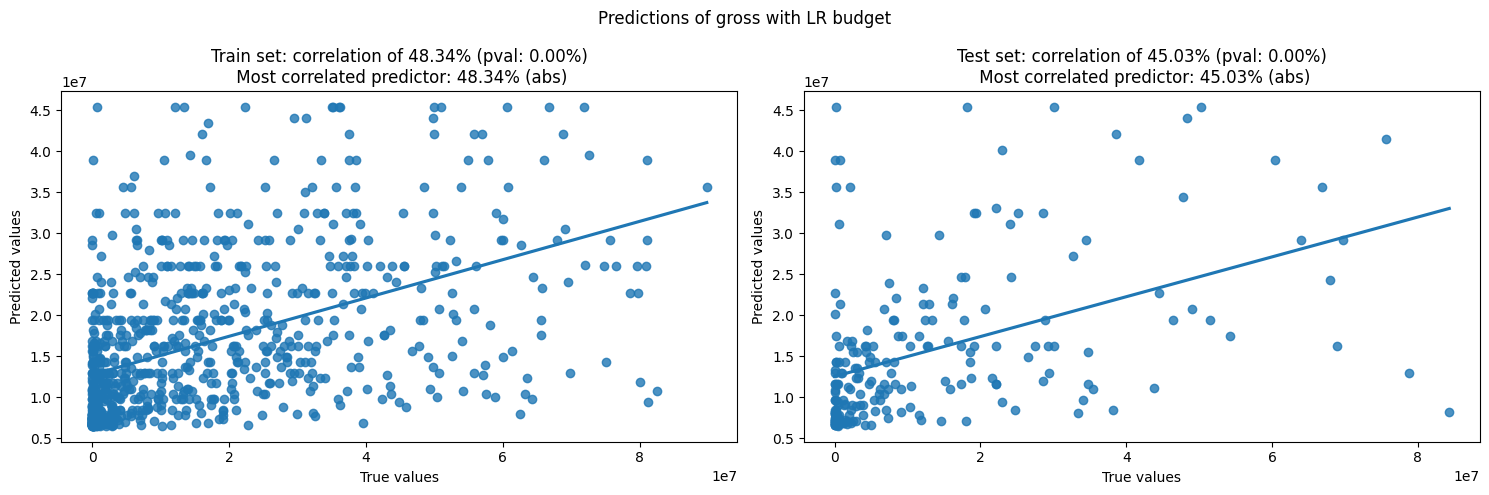

20 initial predictors
20 predictors after encoding
1046 rows before filtering missing values
1011 rows after filtering missing values
2024-04-26 12:38: LR scaled significant features
  - mse: 268797825270617.6875
  - mape: 94.4525
  - r2: -0.2486


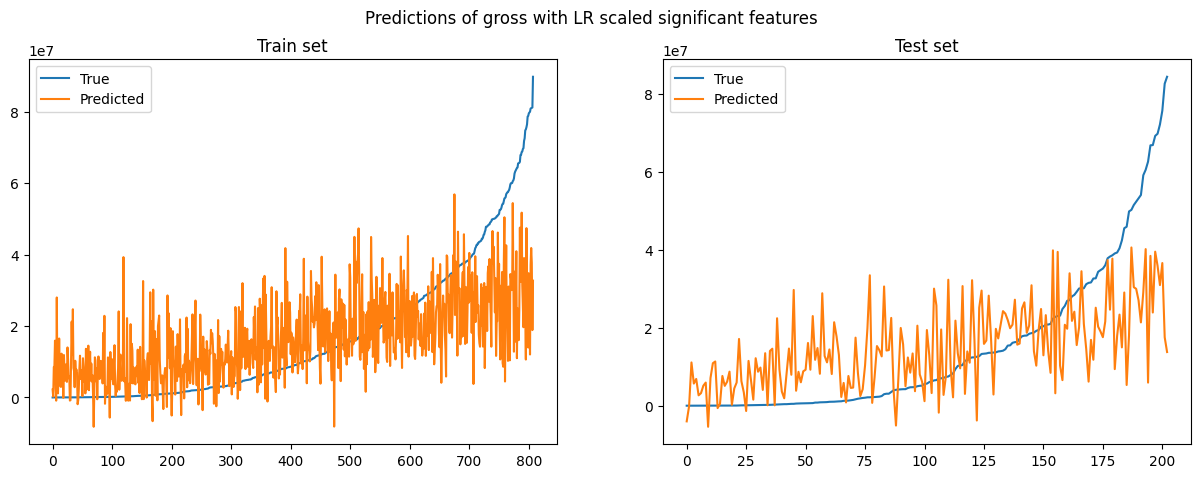

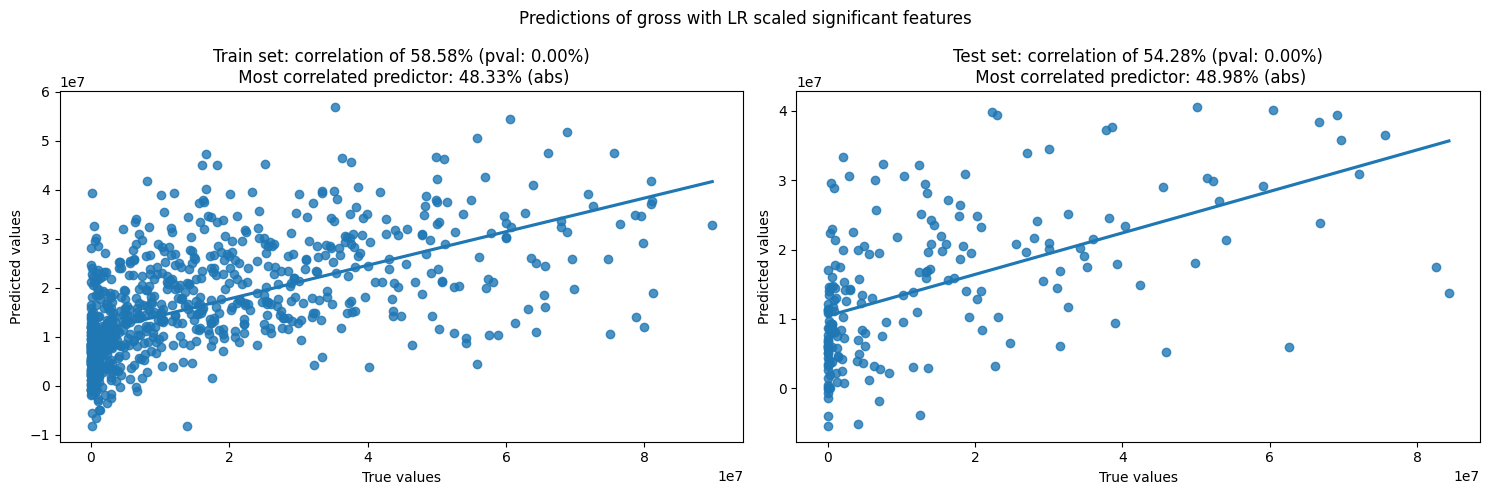

,model,mse,mape,r2,timestamp
0,LR scaled significant features,2.687978e+14,94.452529,-0.248580,2024-04-26 11:45
1,LR significant features,2.695341e+14,111.266586,-0.244837,2024-04-23 09:00
2,LR budget + cast_fb_likes,2.755604e+14,119.575458,-0.206964,2024-04-23 08:56
3,LR all features,2.821058e+14,114.318023,-0.556587,2024-04-23 08:57
4,LR budget,2.883176e+14,151.776651,-0.367388,2024-04-23 08:54
5,RF significant features,3.268791e+14,211.188326,-1.413601,2024-04-24 09:32
6,RF all features,3.312395e+14,226.117642,-1.741651,2024-04-24 09:32
7,LR cast_fb_likes,3.803406e+14,220.990182,-1.359902,2024-04-23 08:56
8,KN significant features,3.818521e+14,117.367751,-0.992415,2024-04-24 09:35
9,KN budget and fb likes,3.834477e+14,138.957906,-0.726172,2024-04-24 09:34


In [15]:
# Budget had a strong correlation with the gross
Sarah.prepare_X_y(target='gross', subset=['budget'])

# We can try a simple linear regression model
_ = Sarah.evaluate_single_model(
    LinearRegression(), cv=5, logs="exploration/simple_model_logs.csv",
    rank="mse", name_log="LR budget", seed=0,
    plot_pred=True, scatter_plot=True, verbose=True)

# We can also try a more complex model by asking Elise for a list of all significant numerical predictors
gross_significant = Elise.get_correlation(target='gross', plot=False)
gross_significant = gross_significant[gross_significant["significant"]==1].index.tolist()

# We can now compare the scaled multiple linear regression model with the simple one
Sarah.prepare_X_y(target='gross', subset=gross_significant)
Sarah.evaluate_single_model(
    make_pipeline(StandardScaler(), LinearRegression()),
    cv=5, logs="exploration/simple_model_logs.csv",
    rank="mse", name_log="LR scaled significant features",
    plot_pred=True, scatter_plot=True, verbose=True, seed=0)

Eventhough all models are still underperforming, Elise and Sarah saw that adding significant features, instead of merely using budget to predict the box office, improved the predictions. In fact, we see from the plots that the model better captures the signal in the data even if it is still very noisy. We also see that adding the other significant features can help to get an incremental correlation with the box office of 10 percentage points.

> Sarah's conclusion: even if the models are still not good enough to be used commercially, the significant features identified by the team bring an incremental correlation of 10 percentage points and help to better capture the signal in the data.

### 3.3. Statistical modelling
*back to [section 3](#3.-Predicting-success)*

Happy to still have a chance to provide insights to Sequoia, Elise and Sarah decided to go further and use a statistical model to understand the controlled effect of the features on the box office. They used backward elimination to get only the significant features before making the results interpretable.

33 initial predictors
102 predictors after encoding
1046 rows before filtering missing values
1011 rows after filtering missing values
Removing 'language_Icelandic' with p-value 0.99 
   -> R²: 0.39 for 102 predictors
Removing 'genre_Thriller' with p-value 0.99 
   -> R²: 0.39 for 101 predictors
Removing 'country_Taiwan' with p-value 0.98 
   -> R²: 0.39 for 100 predictors
Removing 'language_Persian' with p-value 0.98 
   -> R²: 0.39 for 99 predictors
Removing 'country_Iran' with p-value 0.98 
   -> R²: 0.39 for 98 predictors
Removing 'pop_est' with p-value 1.00 
   -> R²: 0.39 for 97 predictors
Removing 'country_Germany' with p-value 0.99 
   -> R²: 0.39 for 96 predictors
Removing 'actor_3_facebook_likes' with p-value 0.96 
   -> R²: 0.39 for 95 predictors
Removing 'actor_1_facebook_likes' with p-value 0.94 
   -> R²: 0.39 for 94 predictors
Removing 'language_Cantonese' with p-value 0.93 
   -> R²: 0.39 for 93 predictors
Removing 'language_German' with p-value 0.93 
   -> R²: 0.39 for

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],LB/Coef,UB/Coef,Relative Range,R2 impact
Feature,,,,,,,,,,
budget,5.091213e-01,3.783826e-02,13.455197,4.815515e-38,4.348695e-01,5.833731e-01,0.854157,1.145843,0.291686,0.117363
year,-2.081167e+05,4.387296e+04,-4.743621,2.405291e-06,-2.942106e+05,-1.220228e+05,1.413681,0.586319,-0.827362,0.014005
duration,1.624357e+05,3.844483e+04,4.225163,2.606463e-05,8.699362e+04,2.378778e+05,0.535557,1.464443,0.928885,0.011486
cast_total_facebook_likes,1.479761e+03,4.126301e+02,3.586167,3.518545e-04,6.700375e+02,2.289484e+03,0.452801,1.547199,1.094397,0.007588
genre_Horror,5.836208e+06,1.674999e+06,3.484305,5.148729e-04,2.549279e+06,9.123137e+06,0.436804,1.563196,1.126392,0.007412
country_USA,3.906366e+06,1.240393e+06,3.149298,1.685329e-03,1.472286e+06,6.340446e+06,0.376894,1.623106,1.246212,0.005755
genre_Drama,-3.473370e+06,1.115088e+06,-3.114885,1.892730e-03,-5.661558e+06,-1.285182e+06,1.629990,0.370010,-1.259980,0.005376
genre_Family,7.094578e+06,2.348515e+06,3.020879,2.584702e-03,2.485979e+06,1.170318e+07,0.350405,1.649595,1.299189,0.005369
content_rating_PG,5.454301e+06,1.882221e+06,2.897801,3.840155e-03,1.760732e+06,9.147871e+06,0.322815,1.677185,1.354369,0.004223


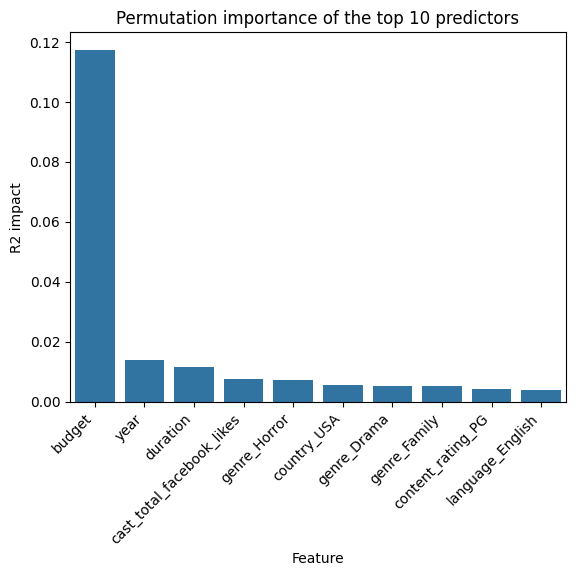

Model 'OLS_enriched_be_0.05' saved in the logs


,name,global_r2,n_coefficients,timestamp
0,OLS_enriched,0.385469,103,2024-04-24 22:23
1,OLS_enriched_be_0.1,0.359587,18,2024-04-24 22:24
2,OLS_enriched_be_0.05,0.352116,14,2024-04-24 22:25
3,OLS_sc_enriched_be_0.05,0.351178,15,2024-04-25 11:00
4,OLS_enriched_be_0.01,0.340301,10,2024-04-24 22:26
5,OLS_original,0.330516,80,2024-04-24 22:20
6,OLS_original_be_0.1,0.310723,12,2024-04-24 22:22
7,OLS_original_be_0.5,0.305904,10,2024-04-24 22:21
8,OLS_budget,0.228216,2,2024-04-24 22:15
9,OLS_actor1_degree,0.022128,2,2024-04-24 22:18


In [16]:
# We'll keep the categorical predictors as well
Sarah.prepare_X_y(target='gross')

# We will use backward elimination with a significance level of 0.05
results = Sarah.get_OLS_significance(
    log_name="OLS_enriched_be_0.05", log_path="exploration/OLS_logs.csv",
    backward_elimination=True, alpha=0.05, explainable=True, verbose=True)
display(results["Logs"])

If the enriched dataset doesn't provide much results when trying to predict future box office, it can help better explain the past box office. Here are a few conclusion from the statistical models:

1. The budget alone can help explain **22.8%** of the variance in the box office. This makes sense given that the two variables are strongly correlated. Movies are investments, and the more you invest, the more you can expect to get in return.

2. By adding the features from the original dataset, we can explain up to **33%** of the variance in the box office. This is a good improvement but with the dummy variables, it represents 79 variables to take into account (80 minus the constant). Through backward elimination, we can still explain **30.6%** of the variance with only 9 features.

3. Finally, with the enriched features, we can bring the part of the variance that we can explain up to **38.5%**. However, the model then includes 102 predictors which is a lot of additional complexity for a little more explained variance. We therefore recommend using the model with backward elimination which can explain **35.2%** of the variance with only 13 features.

By taking a closer look at these 13 features, we find that if all of them are significant, the CI around their impact is narrow (range < 0.5 x impact) for the budget only, reasonable (range < impact) for the year of release and the duration of the movie, and large (range > impact) for the other predictors.

> Sarah and Elise's conclusion: eventhough the enriched dataset can help us understand up to 38.5% of the variance in the box office, only a few predictors truly matter (namely the year of release which was worth scrapping). The gross revenue is mostly driven by the budget. The other predictors can explain an incremental 15.7% of the variance (12.4% if we reduce the number of predictors from 102 to 13) but the importance of the individual predictors are quite limited.

---
## 4. Discussion and conclusion
*back to [table of contents](#Structure-of-the-project)*

We will end this report with these two final sections:

- [4.1. Final conclusion](#4.1.-Final-conclusion)
- [4.2. ROI discussion](#4.2.-ROI-discussion)
---

### 4.1. Final conclusion
*back to [section 4](#4.-Discussion-and-conclusion)*

**Overall conclusion**

Throughout their report, the team of consultants at the Movie Director's Office has tried to answer the question: is it possible to predict the success of a movie before its release?

The overall conclusion is that there is too much uncertainty in the movie industry to accurately predict the success of a movie before its release. The team has shown that the success of a movie is mostly driven by its budget and that the other predictors can only explain an incremental 15.7% of the variance in the box office (bringing the total to 38.5%) which leaves most of the variance unexplained. However, the team has provided numerous insights into the movie industry (actors relations, drivers of success, market potential) which can help Sequoia understand the industry and make more informed decisions.

**Recommendations**

Sequoia can use the insights provided to include them in their regular risk evaluation. However, they cannot use model based on the current enriched dataset to reliably predict the box office of a movie. 

If they truly want to develop a model-based investment strategy, the Movie Director's Office would recommend investing in deep learning to study which sequences, images, tones of voices, characters, and other small details influence the success of a movie (in a similar fashion to what Netflix does to decide what to produce).



### 4.2. ROI discussion
*back to [section 4](#4.-Discussion-and-conclusion)*

In this report we focussed on the box office because this will determine how much royalties Sequoia will get if they exercise the options on the movie rights. With no surprise, we saw that the gross revenue is mainly driven by the budget of the movie.

However, if we took `Universal Pictures`' perspective, we would rather focus on the return on investment. If the studio invests a huge budget in a movie, they don't merely want a high box office, they want a return on the money they invested. Let's therefore have a look at:

$$ROI = \frac{Gross - Budget}{Budget}-1$$

And see if it is still correlated with the budget or if we can find other predictors which are more relevant to predict the return on investment.

In [17]:
# Let's add an ROI measure in Elise's dataset and ask her about the correlations

Elise.full["ROI"] = (Elise.full["profit"] / Elise.full["budget"]) - 1
Elise.get_correlation(target='budget', predictors=["gross","ROI"])

,correlation_budget,p-value,significant
gross,0.486305,3.894367e-59,1
ROI,-0.060895,5.707697e-02,0


Elise concludes that budget is relevant for Sequoia to predict the box office but not for Universal Pictures who are interested in return on investment.

33 initial predictors
102 predictors after encoding
1046 rows before filtering missing values
1011 rows after filtering missing values
Removing 'content_rating_Passed' with p-value 1.00 
   -> R²: 0.07 for 102 predictors
Removing 'country_Japan' with p-value 1.00 
   -> R²: 0.07 for 101 predictors
Removing 'language_German' with p-value 0.99 
   -> R²: 0.07 for 100 predictors
Removing 'language_Kazakh' with p-value 0.99 
   -> R²: 0.07 for 99 predictors
Removing 'country_South Korea' with p-value 0.99 
   -> R²: 0.07 for 98 predictors
Removing 'country_Romania' with p-value 1.00 
   -> R²: 0.07 for 97 predictors
Removing 'country_USA' with p-value 1.00 
   -> R²: 0.07 for 96 predictors
Removing 'country_Brazil' with p-value 1.00 
   -> R²: 0.07 for 95 predictors
Removing 'language_Portuguese' with p-value 1.00 
   -> R²: 0.07 for 94 predictors
Removing 'genre_Thriller' with p-value 0.99 
   -> R²: 0.07 for 93 predictors
Removing 'country_Sweden' with p-value 1.00 
   -> R²: 0.07 for 92

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],LB/Coef,UB/Coef,Relative Range,R2 impact
Feature,,,,,,,,,,
content_rating_Unrated,154.774000,20.861187,7.419233,2.497738e-13,113.837671,195.710329,0.735509,1.264491,0.528982,0.051450
actor_1_facebook_likes,-0.019117,0.008752,-2.184169,2.917965e-02,-0.036292,-0.001942,1.898429,0.101571,-1.796857,0.003249
year,0.006934,0.003184,2.177603,2.966688e-02,0.000686,0.013183,0.098862,1.901138,1.802275,-0.000075


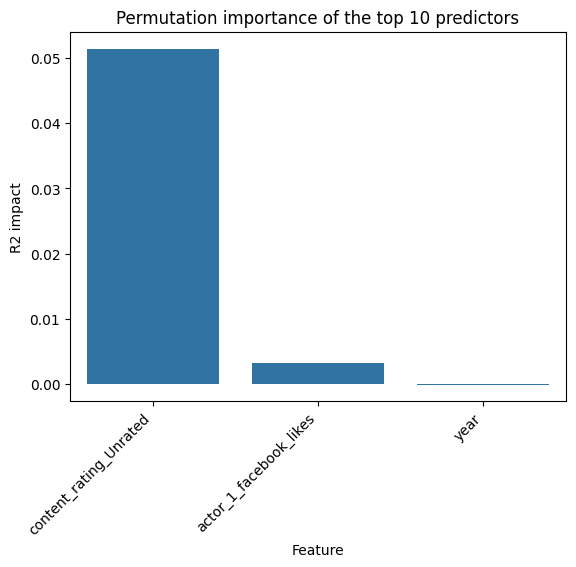

Model 'OLS_enriched_be_0.05' saved in the logs


,name,global_r2,n_coefficients,timestamp
0,OLS_enriched,0.071521,103,2024-04-25 10:46
1,OLS_enriched_be_0.1,0.061182,3,2024-04-25 10:46
2,OLS_enriched_be_0.05,0.061182,3,2024-04-25 10:43


In [20]:
# Let's tell Sarah about the new ROI metric
Sarah.full["ROI"] = (Sarah.full["profit"] / Sarah.full["budget"]) - 1

# Then let's ask her what can be learned from the statistical modeling
Sarah.prepare_X_y(target="ROI")
results = Sarah.get_OLS_significance(
    log_path="exploration/ROI_OLS_logs.csv", log_name="OLS_enriched_be_0.05", verbose=True,
    backward_elimination=True, alpha=0.05, explainable=True)
display(results["Logs"])

Sarah concludes that it is practicaly impossible to predict the specific return on investment of a movie and offers. She wonders whether she could simplify the task and build a classifier to know whether the movie will be profitable or not instead of predicting the exact return on investment.

In [21]:
Sarah.classify_profitable(
    make_pipeline(StandardScaler(), MLPClassifier()),
    log=True, log_name="Scaled NN - All", log_path="exploration/profit_classifier.csv")

,name,accuracy,precision,recall,f1,timestamp
0,Scaled NN 1000 max_iter - All,0.733883,0.536577,0.441241,0.418150,2024-04-25 10:51
1,Scaled NN 400 max_iter - All,0.730903,0.551626,0.424490,0.404682,2024-04-25 10:51
2,Scaled NN 5000 max_iter - All,0.711111,0.502135,0.441241,0.396617,2024-04-25 10:52
3,Scaled NN - All,0.729927,0.558774,0.412245,0.380083,2024-04-25 10:50
4,Scaled KNN - All,0.733883,0.449553,0.340646,0.372739,2024-04-25 10:53
5,Scaled LogisticRegression - All,0.723996,0.539350,0.324915,0.307935,2024-04-25 10:47
6,RandomForest - All,0.733907,0.384993,0.237500,0.228902,2024-04-25 10:48
7,LogisticRegression - All,0.696279,0.359936,0.208333,0.145181,2024-04-25 10:48
8,Scaled SVC - All,0.765586,0.542512,0.087500,0.136845,2024-04-25 10:49
9,NN - All,0.763605,0.120000,0.037500,0.057143,2024-04-25 10:50


After trying a few models, Sarah found out that some complex relations between the predictors uncovered with a neural network could be used to predict whether a movie will be profitable or not. However, the classifier has poor performance. In fact, the best model is only correct 54% of the time when it concludes that a movie will be profitable.

Once again, the dynamics of the movie industry are too complex to be able to draw a simple "recipe for success".

___

This case study has been realised in the context of the Hackathon course at the [Vlerick Business School](https://www.vlerick.com/en/programmes/masters-programmes/masters-in-general-management-business-analytics-ai-track/).

The Hackathon is centred on the principle of innovation and here are a few technical innovation which have been used to realise the case study:

- `Object-oriented programming` and `Encapsulation`: all the code for preparation, vizualisation, and modelling has been encapsulated in classes and packaged in the MDO package to make the final report accessible to non-technical profiles. All the source code is available in the movie_director_office.py module.

- `Interoperability`: to enable reuse (GPU License), the code has been documented, saved with version controlling on the [hackathon repository](https://github.com/MathieuDemarets/hackathon). The packages used to develop this project have also been saved in the mdo_requirements text file.

- `Multi-threaded webscrapping`: to enrich the data with the release years of the various movies, we created a bot to browse, search the movie, and retrieve the year of release. That bot can work in parallel with other bots to speed up the process.

- `API calls`: to simulate the agent's knowledge of the celebrities, we gave it access to an API giving information on the actors.

- `Coding best practices`: all classes have been documented with numpy docstring, types have been defined to support mypy type checking, and the style has been adapted through black, and checked through pylint to reach a minimum of 7.5/10 (to allow some flexibility).

- `Geospatial analysis`: geospatial data has been used to enrich the dataset (simple index matching) but also to create an interactive world map for easy vizualisation and enabling the user to get the information he/she wants.

- `Network analysis`: we reformatted the actors name and movie name features to build a graph of actors who played together. Then we applied graph theory to engineer new features on the base of this relationship network.

I hope you enjoyed reading this case study as much as I had fun thinking about the narrative and the various techniques to leverage.

[Mathieu Demarets](https://www.linkedin.com/in/mathieudemarets/)